In [38]:
import os
import pandas as pd
from math import floor
import matplotlib
from matplotlib import pyplot, patches
pyplot.style.use("ggplot")

## Quick summary of all FDR estimate information

In [4]:
# This dict will map decoy context name to a DataFrame indicating the FDR estimates for this context
ctx2fdr = {}

output_dir = "/Poppy/mfedarko/chicken-gut-meta/sf/fdr-estimate-dmac100x/"

numpermbs = pd.read_csv(os.path.join(output_dir, "num-mutations-per-mb.tsv"), sep="\t", index_col=0)

for tsv_fp in os.listdir(output_dir):
    if tsv_fp.startswith("fdr-"):
        # remove the starting "fdr-" and ending ".tsv"
        ctx = tsv_fp[4:-4]
        ctx2fdr[ctx] = pd.read_csv(os.path.join(output_dir, tsv_fp), sep="\t", index_col=0)
    
print("All decoy contexts we found:\n -", "\n - ".join(ctx2fdr.keys()))
ctx2fdr["CP2"].head()

All decoy contexts we found:
 - CP2
 - CP2Nonsense
 - CP2Nonsyn
 - CP2Tv
 - CP2TvNonsense
 - Full
 - Nonsense
 - Nonsyn
 - Tv
 - TvNonsense
 - TvNonsyn


,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,...,r90,r91,r92,r93,r94,r95,r96,r97,r98,r99
Contig,,,,,,,,,,,,,,,,,,,,,
s0.ctg000001l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1.ctg000002c,14.015042,4.802684,2.854462,1.680074,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s10.ctg000011c,29532.378311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s100.ctg000114l,5.727921,6.137058,635.799225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1000.ctg001185l,31.226306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Select some high-diversity-index contigs

In [11]:
di = pd.read_csv("/Poppy/mfedarko/chicken-gut-meta/sf/call-r-minr3/diversity-indices.tsv", sep="\t", index_col=0)
long_di = di[di["Length"] >= 1000000]
long_di_sorted = long_di.sort_values(["DivIdx(r=50,minSuffCov=100.0)"], ascending=False)
long_di_sorted.head(8)

,AverageCoverage,Length,"DivIdx(r=2,minSuffCov=4.0)","DivIdx(r=3,minSuffCov=6.0)","DivIdx(r=4,minSuffCov=8.0)","DivIdx(r=5,minSuffCov=10.0)","DivIdx(r=10,minSuffCov=20.0)","DivIdx(r=20,minSuffCov=40.0)","DivIdx(r=50,minSuffCov=100.0)","DivIdx(r=100,minSuffCov=200.0)"
Contig,,,,,,,,,,
s136.ctg000161c,116.258861,1804877,0.000713,0.000300,0.000276,0.000273,0.000252,0.000231,2.037024e-04,NaN
s11.ctg000012l,210.620674,1947245,0.001417,0.000240,0.000144,0.000118,0.000061,0.000061,3.993687e-05,0.000007
s237.ctg000283c,144.567805,3375989,0.005345,0.002199,0.000733,0.000288,0.000043,0.000040,3.034671e-05,NaN
s1.ctg000002c,304.735459,3005398,0.003192,0.000775,0.000485,0.000381,0.000095,0.000026,2.228848e-05,0.000000
s441.ctg000525l,210.427492,1555113,0.001087,0.000128,0.000051,0.000013,0.000003,0.000001,6.660938e-07,0.000000
s58.ctg000063c,105.286754,4286324,0.000300,0.000050,0.000040,0.000031,0.000024,0.000002,0.000000e+00,NaN
s61.ctg000066c,226.603520,4860662,0.001125,0.000101,0.000035,0.000024,0.000009,0.000000,0.000000e+00,0.000000
s71.ctg000079c,150.283138,3586972,0.001040,0.000153,0.000067,0.000048,0.000040,0.000035,0.000000e+00,NaN


## Plot FDR curves

In [27]:
# settings stolen from myself at
# https://github.com/fedarko/sheepgut/blob/main/sf-analyses/sheep/3-PlotFDRCurves.ipynb
#
# (I know, I know, I should abstract this to another code file or something)

# rainbow colorscheme - inspired by Elias/Gygi '07, Fig. 2a & 2b (and also homestuck lol)
#
# Note that we have 10 colors, not 11, since we will not be plotting the "CP2Nonsyn" context (see
# below for details)
rainbow = [
    "#713F16", "#D40000", "#D47400", "#D4CE00", "#2F8C04",
    "#00BBC3", "#0079CC", "#0022CC", "#790096", "#CC007C"
]

# go o+solid, o+dashed, o+dotted, o+dashdot, D+solid, ...
# this way of varying linestyles and markers means that even if the reader cannot perceive
# differences in color they should still be able to unambiguously figure out which line is which
# see https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
linestyles = ["solid", (0,(5,1)), (0, (1,1)), "dashdot"] * 3
markers = (["o"] * 4) + (["D"] * 4) + (["*"] * 2)

# Draw a line indicating "wow we can fix the estimated FDR here"
fdr_fix_pct = 1
fdr_fix_color = "#333"

# What contigs are we going to plot?
small_plot_contigs = list(long_di_sorted.index[:8])

BIG_CONTIG = "s1.ctg000002c"
assert BIG_CONTIG in small_plot_contigs

DECOY_CONTIG = "s171.ctg000204l"
assert DECOY_CONTIG not in small_plot_contigs

# What contexts are we going to plot, and what colors do we want to use?
# Let's order them up here, so that we can consistently map them to a color + style.
# Match orderings in the other SheepGut FDR curves...
ctxs = ["CP2", "Nonsyn", "Full", "CP2Tv", "TvNonsyn", "Tv", "Nonsense", "TvNonsense", "CP2Nonsense", "CP2TvNonsense"]

# Keep it simple for the small plots, which don't have a ton of space
ctx_to_plot_small = ["Full", "CP2", "Tv", "Nonsense"]

# Map context names to colors, linestyles, and markers
ctx2color = {}
ctx2linesty = {}
ctx2marker = {}
for ci, ctx in enumerate(ctxs):
    ctx2color[ctx] = rainbow[ci]
    ctx2linesty[ctx] = linestyles[ci]
    ctx2marker[ctx] = markers[ci]

# Also map context names to easier-to-read ones
ctx2name = {
    "CP2": "CP2",
    "CP2Nonsense": "CP2 & Nonsense",
    "CP2Nonsyn": "CP2 & Nonsyn",
    "CP2Tv": "CP2 & Tv",
    "CP2TvNonsense": "CP2 & Tv & Nonsense",
    "Full": "Full [no context]",
    "Nonsense": "Nonsense",
    "Nonsyn": "Nonsyn",
    "Tv": "Tv",
    "TvNonsense": "Tv & Nonsense",
    "TvNonsyn": "Tv & Nonsyn",
}
    
pvals = [int(pstr[1:]) for pstr in numpermbs.columns]
min_p = min(pvals)
max_p = max(pvals)

special_p_kwargs = {"color": "#333", "fontsize": 17, "fontweight": "semibold"}

In [28]:
def plot_fdr_curves(ctx2fdr, numpermbs, contig, ctx_to_plot, ax, lw=3, markersize=5, xlim_min=-0.3):
    thresh_vals = [int(tstr[1:]) for tstr in numpermbs.columns]
    tt = numpermbs.columns[0][0]
    assert tt in ["p", "r"]
    xlim_max = 100
    for ctx in ctx_to_plot:
        x = []
        y = []
        best_thresh = None
        
        xvals = ctx2fdr[ctx].loc[contig]
        yvals = numpermbs.loc[contig]
        
        for f, n, thresh in zip(xvals, yvals, thresh_vals):
            if not pd.isna(f):
                x.append(f)
                y.append(n)
                
                errtext = f"for ctx {ctx} for contig {contig}"
                # this case can be handled, of course, but it's nice to know when things get high
                # *don't* need to clamp
                if f >= xlim_max:
                    print(f"FYI we found an est FDR = {f}% >= {xlim_max}% {errtext}")
                    xlim_max = f * 1.2
                    
                # should never happen
                if f < 0:
                    raise ValueError(f"Found an est FDR = {f}% < 0% {errtext} (what????)")
                    
                if f <= fdr_fix_pct:
                    # we're iterating through these in ascending order, so i guess we could
                    # just break once we see a "passing" value of r. but let's idiotproof this
                    # in case i change the order later lol
                    if best_thresh is None or thresh < best_thresh:
                        best_thresh = thresh

        if best_thresh is not None:
            if tt == "p":
                ts = f"($p$ = {best_thresh / 100:.2f}%)"
            else:
                ts = f"($r$ = {best_thresh:,})"
            label = f"{ctx2name[ctx]} {ts}"
            
        else:
            label = f"{ctx2name[ctx]} (no rare mutations selectable)"
                        
        # plot the curve itself
        ax.plot(
            x,
            y,
            color=ctx2color[ctx],
            linestyle=ctx2linesty[ctx],
            marker=ctx2marker[ctx],
            lw=lw,
            label=label,
            markersize=markersize
        )
        
    ax.axvline(x=fdr_fix_pct, linestyle="--", color=fdr_fix_color, lw=lw)
    
    ax.set_xscale("symlog")
    ax.xaxis.set_major_formatter("{x:,.0f}")
    ax.yaxis.set_major_formatter("{x:,.0f}")
    ax.set_xlim(xlim_min, xlim_max)
    
    ax.tick_params(axis="y", which="major", labelsize=11)
    ax.tick_params(axis="x", which="major", labelsize=11)
    ax.tick_params(axis="x", which="minor", labelsize=9.5)


FYI we found an est FDR = 100.24996181052087% >= 100% for ctx Full for contig s441.ctg000525l
FYI we found an est FDR = 255.75367115458192% >= 100% for ctx Full for contig s58.ctg000063c
FYI we found an est FDR = 127.51518446116606% >= 100% for ctx Full for contig s61.ctg000066c


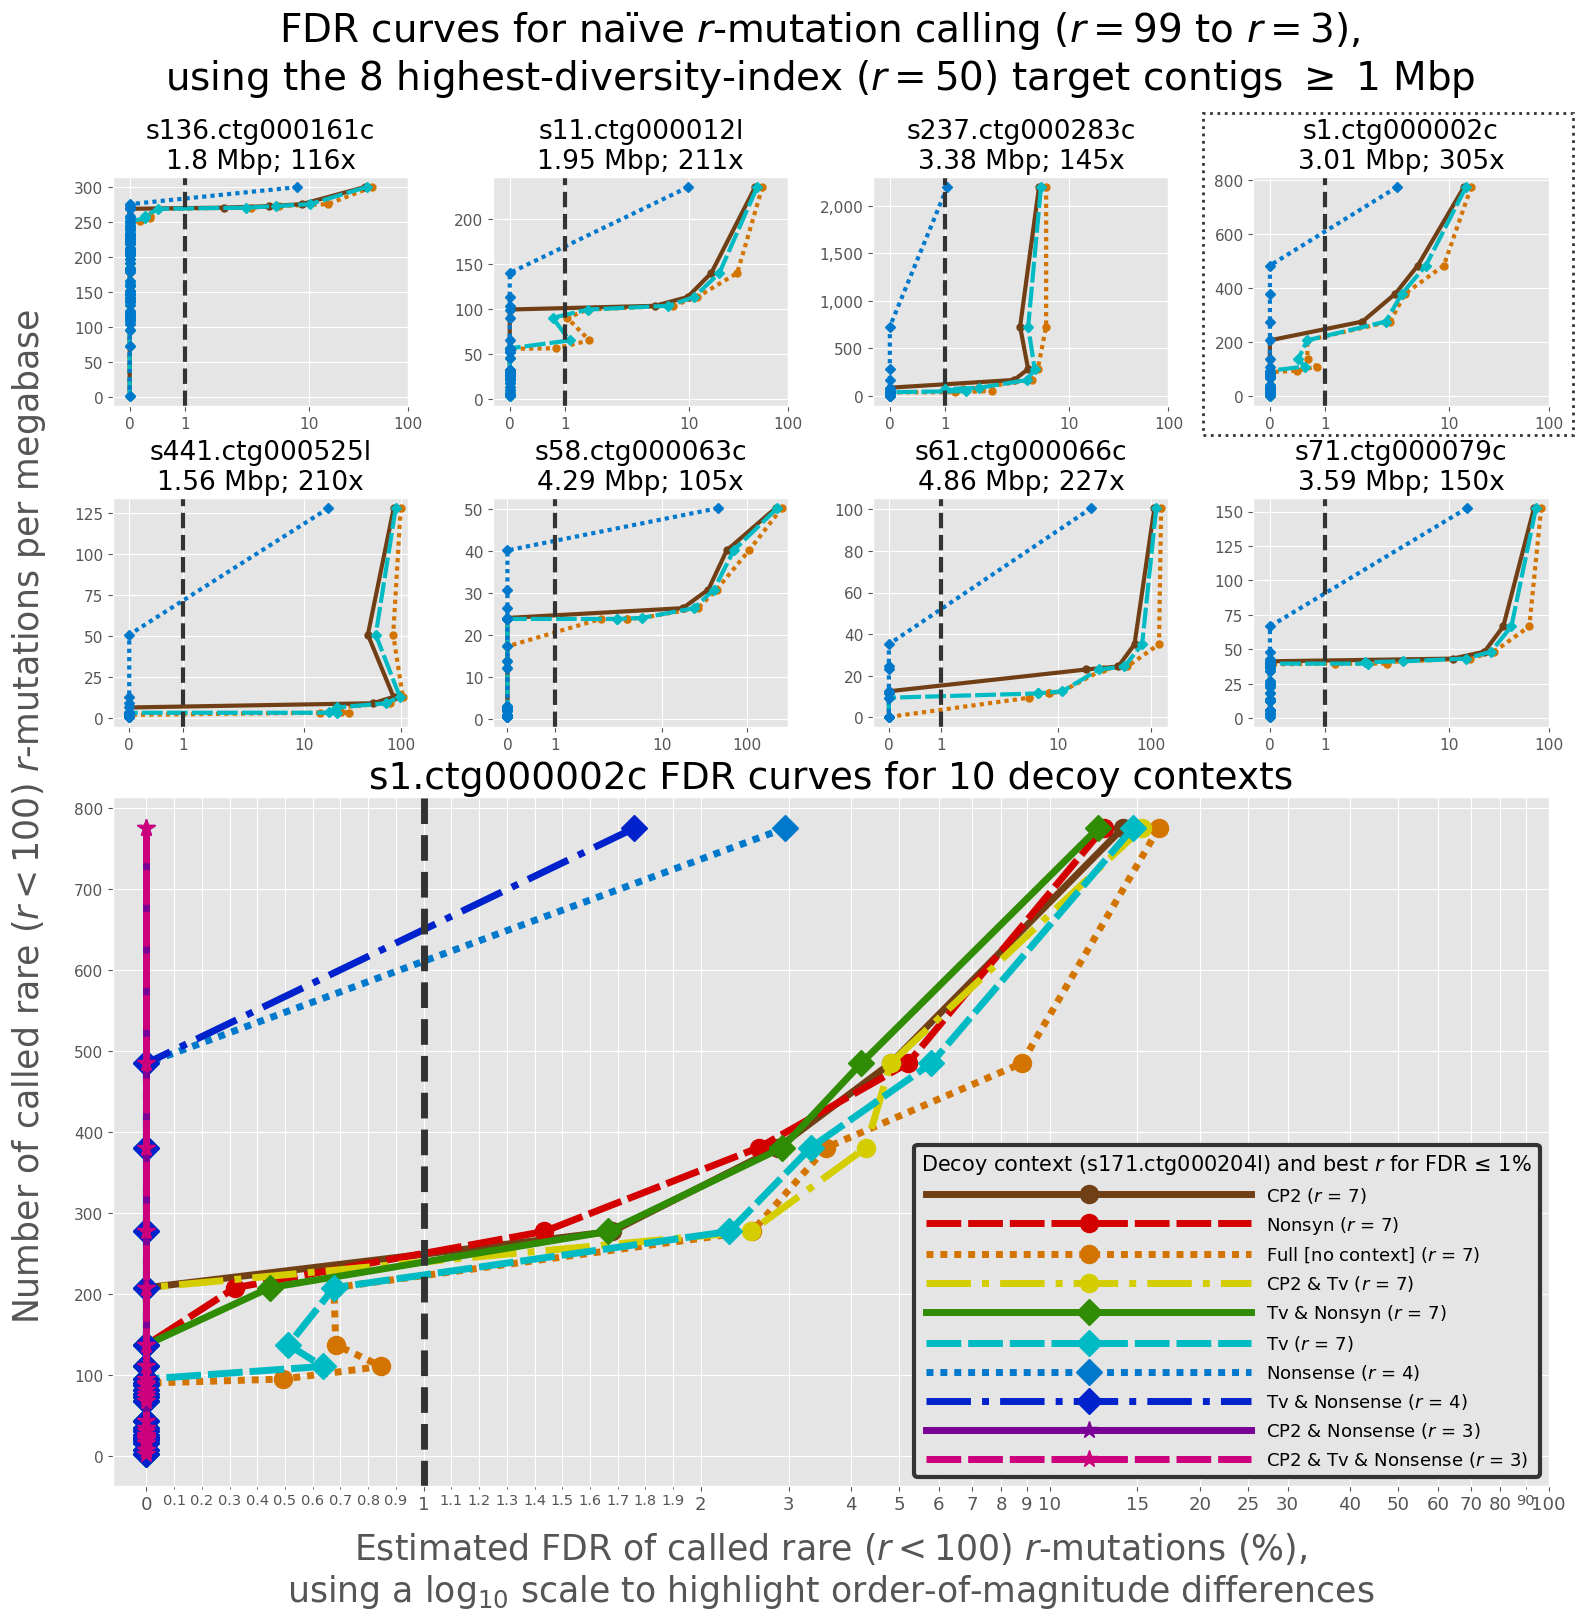

In [50]:
fig, axes = pyplot.subplot_mosaic(
    [
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
    ],
    constrained_layout=True
)

for ci, contig in enumerate(small_plot_contigs):
    # We'll organize the grid of plots starting from the top-left and moving right:
    # 0 1 2 3
    # 4 5 6 7
    # This matches the suplot mosaic labels we set above.
    
    assert contig != DECOY_CONTIG
    
    # set up title
    length_info = f"{round(long_di_sorted['Length'][contig] / 1e6, 2):,} Mbp"
    cov_info = f"{round(long_di_sorted['AverageCoverage'][contig]):,}x"
    title = f"{contig}\n{length_info}; {cov_info}"
    axes[ci].set_title(title, fontsize=19)
    
    plot_fdr_curves(ctx2fdr, numpermbs, contig, ctx_to_plot_small, axes[ci])
    
plot_fdr_curves(ctx2fdr, numpermbs, BIG_CONTIG, ctxs, axes[8], lw=5, markersize=13, xlim_min=-0.12)

# fancy x-axis stuff for the bottom plot
# from https://nbviewer.org/github/fedarko/sheepgut/blob/main/notebooks/DemonstratingTargetDecoyApproach.ipynb
ff = matplotlib.ticker.FuncFormatter(
    lambda x, pos: str(int(x)) if x > 20 else "{:,}".format(x)
)
axes[8].xaxis.set_major_formatter(ff)
axes[8].xaxis.set_minor_formatter(ff)
axes[8].set_xticks([x / 10 for x in range(1, 20)] + [90], minor=True)
axes[8].set_xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100])
axes[8].tick_params(axis="x", which="major", labelsize=13)
axes[8].tick_params(axis="x", which="minor", labelsize=10.5)

# fancy legend for the bottom plot
axes[8].legend(
    handlelength=18,
    fontsize=13,
    title=f"Decoy context ({DECOY_CONTIG}) and best $r$ for FDR \u2264 1%",
    title_fontsize=15,
    framealpha=1,
    edgecolor="#333",
).get_frame().set_linewidth(3)

# title for the bottom plot
axes[8].set_title(
    f'{BIG_CONTIG} FDR curves for {len(ctxs):,} decoy contexts',
    fontsize=27
)

# the minor ticks don't make vertical gridlines show up by default -- this fixes that
axes[8].grid(which="both", color="white")

# Add a rectangle surrounding the subplot for the small BIG_CONTIG FDR curve
brect = patches.Rectangle(
    (0.755, 0.786), 0.247, 0.215, edgecolor="#333", facecolor="None", lw=2, linestyle=":",
    transform=fig.transFigure
)
fig.patches.extend([brect])

rare_text = "called rare ($r < 100$) $r$-mutations"
fig.text(
    -0.04, 0.2, f"Number of {rare_text} per megabase",
    fontsize=25, rotation="vertical", color="#555"
)
axes[8].set_xlabel(
    (
        f"Estimated FDR of {rare_text} (%),\n"
        "using a log$_{{10}}$ scale to highlight order-of-magnitude differences"
    ),
    fontsize=25, color="#555", labelpad=12
)
fig.suptitle(
    (
        f"FDR curves for na\u00efve $r$-mutation calling ($r = 99$ to $r = 3$),\n"
        f"using the {len(small_plot_contigs):,} highest-diversity-index ($r = 50$) target contigs $\geq$ 1 Mbp"
    ),
    fontsize=28,
    y=1.07
)

fig.set_size_inches(15, 15)
fig.savefig("../../notebooks/figs/chickengut_fdr_curves.pdf", bbox_inches="tight")